# Oversampling (sobreamostrados)

# Carregando bibliotecas

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando dataset

In [2]:
tweets_df = pd.read_csv('')
tweets_df.head(4)

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False


# Análise exploratória de dados (EDA)

## Eliminando as colunas que não serão utilizada

In [3]:
tweets_df.columns

Index(['id', 'hashtag', 'votes', 'hard', 'sentiment', 'group', 'text',
       'repeat'],
      dtype='object')

In [4]:
tweets_df.drop(columns=['id', 'hashtag', 'votes', 'hard', 'group', 'repeat'], inplace=True)

tweets_df.head()

,sentiment,text
0,1,que coisa linda O programa estava mostrando um...
1,1,por mais com as irmãs galvão adorei elas
2,1,mr CATRA USERNAME lançando sua nova música PPK...
3,0,quem viu aquela lutadora modela barbuda tatuad...
4,-1,tô passada com esse cara quanta merda pode sai...


In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15047 non-null  object
 1   text       15047 non-null  object
dtypes: object(2)
memory usage: 235.2+ KB


In [6]:
tweets_df.groupby(['sentiment']).count()

,text
sentiment,
-,47
-1,4426
0,3926
1,6648


In [7]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [8]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

In [9]:
tweets_df.groupby(['sentiment']).count()

,text
sentiment,
0,4426
1,3926
2,6648


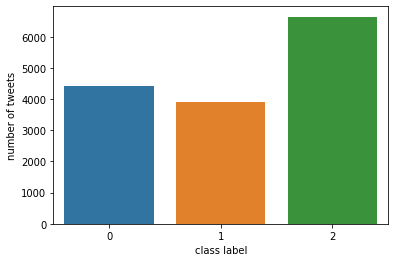

In [10]:
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

#   Limpando o texto

1. Removendo os @users do Twitter
2. Removendo as urls do texto 
3. Removendo pontuações, números e caracteres espaciais

5. Converter o texto em minusculo
6. Rovendo as Stopwords
7. Realizando Stemming nas palavras
8. Realizando Lemmatization nas palavras

In [11]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [12]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [14]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [15]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
tweets_df['length_tweet']=tweets_df['text_clean'].str.len()
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,sentiment,text,text_clean,length_tweet
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65


# Lemmatization

In [16]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-27 22:15:29.606386: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 32.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [17]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [18]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [19]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]

In [20]:
tweets_df.head()

,sentiment,text,text_clean,length_tweet,text_lemma
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19,irmã galvão ador
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [21]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import simplemma
from simplemma import text_lemmatizer

In [23]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [24]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente

In [25]:
tweets_df.head()

,sentiment,text,text_clean,length_tweet,text_lemma,text_lemma_2
0,2,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,coisa linda programa mostrando familia adotou adolescente anos amor,67,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,2,por mais com as irmãs galvão adorei elas,irmãs galvão adorei,19,irmã galvão ador,irmão galvão adorar
2,2,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,62,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,1,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,viu lutadora modela barbuda tatuada masterchefbr,48,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,0,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,tô passada cara quanta merda pode sair boca alguém alguns minutos,65,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


## Trabalhando no equilibrio dos dados

### Iniciando o trabalho de balanceamento dos dados

In [26]:
# criando a lista sentimentos (com as quantidades das classes)
sentimentos = []
sentimentos.append(tweets_df.loc[tweets_df['sentiment'] == 0]['sentiment'].count())
sentimentos.append(tweets_df.loc[tweets_df['sentiment'] == 1]['sentiment'].count())
sentimentos.append(tweets_df.loc[tweets_df['sentiment'] == 2]['sentiment'].count())

sentimentos

[4426, 3926, 6648]

In [27]:
# colacando a lista sentimento em ordem (minoria, meio, maioria)
sentimentos.sort()
sentimentos

[3926, 4426, 6648]

In [28]:
# instanciando as classes de sentimentos
sent = [0, 0, 0]
for i in range(len(sentimentos)):
  for j in range(len(sentimentos)):
    if sentimentos[i] ==tweets_df.loc[tweets_df['sentiment'] == j]['sentiment'].count():
      sent[i] = tweets_df.loc[tweets_df['sentiment'] == j]

minoria = sent[0]
meio = sent[1]
maioria = sent[2]

In [29]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6648

Meio 
4426

Minoria 
3926


In [30]:
from sklearn.utils import resample

menor_maior = resample(minoria, replace=True, n_samples=len(maioria), random_state=123)
meio_maior = resample(meio, replace=True, n_samples=len(maioria), random_state=123)

In [31]:
print(menor_maior.count(), meio_maior.count(), maioria.count())

sentiment       6648
text            6648
text_clean      6648
length_tweet    6648
text_lemma      6648
text_lemma_2    6648
dtype: int64 sentiment       6648
text            6648
text_clean      6648
length_tweet    6648
text_lemma      6648
text_lemma_2    6648
dtype: int64 sentiment       6648
text            6648
text_clean      6648
length_tweet    6648
text_lemma      6648
text_lemma_2    6648
dtype: int64


In [32]:
# juntando os dataframes
tweets_df_equilibrado_maior = pd.concat([menor_maior, meio_maior, maioria])

# resetando o index
tweets_df_equilibrado_maior = tweets_df_equilibrado_maior.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_maior.drop(columns=['index'], inplace=True)

In [33]:
tweets_df_equilibrado_maior.groupby(['sentiment']).count()

,text,text_clean,length_tweet,text_lemma,text_lemma_2
sentiment,,,,,
0,6648,6648,6648,6648,6648
1,6648,6648,6648,6648,6648
2,6648,6648,6648,6648,6648


# Processo de vetorização

###Word2vec
__size:__ The number of dimensions of the embeddings and the default is 100.

__window:__ The maximum distance between a target word and words around the target word. The default window is 5.

__min_count:__ The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

__workers:__ The number of partitions during training and the default workers is 3.

__sg:__ The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [34]:
import gensim

tokenize = tweets_df_equilibrado_maior['text_lemma_2'].apply(lambda x: x.split()) #tokenização
w2vec_model = gensim.models.Word2Vec(tokenize, min_count = 1, size = 100, window = 5, sg = 1) #carregamento do modelo work2vec
w2vec_model.train(tokenize, total_examples = len(tweets_df_equilibrado_maior['text_lemma_2']), epochs=20) #treinamento do modelo work2vec

(2394762, 2611580)

In [35]:
w2vec_model.most_similar('carro')

[('tras', 0.8235510587692261),
 ('gêmea', 0.7659837007522583),
 ('combi', 0.7635663747787476),
 ('viajar', 0.7437652349472046),
 ('sensacionalizando', 0.6770213842391968),
 ('aficcionados', 0.6750006079673767),
 ('feliciade', 0.6683341264724731),
 ('alagoa', 0.662590503692627),
 ('hhahhahahhahahha', 0.6571389436721802),
 ('invejinhaaa', 0.6544292569160461)]

In [36]:
# preparando para vetorização
w2v_words = list(w2vec_model.wv.vocab)
print("number of words that occured minimum 5 times ", len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  10170
sample words  ['assistir', 'gente', 'q', 'preferir', 'criança', 'ficar', 'familia', 'adotar', 'casal', 'gay', 'encontro', 'querer', 'cabelo', 'colorir', 'tbm', 'alguém', 'notar', 'anita', 'dublar', 'leo', 'lins', 'tava', 'locasso', 'antes', 'contar', 'história', 'mulher', 'rico', 'tudo', 'pra', 'engravidar', 'conseguir', 'pobre', 'gozar', 'coxo', 'vir', 'logo', 'gêmeos', 'alô', 'loiro', 'ô', 'saber', 'mexer', 'moreno', 'olhar', 'poim', 'fazer', 'enlouquecer', 'mãe', 'facil']


In [37]:
# Vetorizador (transforma o conjunto de palavras em um conjunto numérico)

vector = []
from tqdm import tqdm
for sent in tqdm(tokenize):
  sent_vec = np.zeros(100)
  count = 0
  for word in sent: 
    if word in w2v_words:
      vec = w2vec_model.wv[word]
      sent_vec += vec 
      count += 1
  if count != 0:
    sent_vec /= count #normalize
  vector.append(sent_vec)
print(len(vector))
print(len(vector[0])) 

100%|██████████| 19944/19944 [00:16<00:00, 1226.95it/s]

19944
100


In [38]:
#example
l='coisa linda programa mostrando familia adotou adolescente anos amor'
count = 0
vcc = np.zeros(100)
for word in l:
  if word in w2v_words:
    v = w2vec_model.wv[word]
    vcc += v
    count += 1
vcc

array([ 25.68106203, -14.54339676, -13.25581645,   1.50094262,
         3.83458674,  -5.57868369,   0.48413777,  -2.19806173,
       -16.01997386,  -2.73663554,  13.67722183,  26.52116257,
         2.80637786,  10.54021874,  34.50935899, -16.34746816,
         8.43520349,  -6.30481225, -11.0702314 ,  -5.51050356,
        -1.21901073, -31.60781674,  -2.93329964,  -9.73604404,
       -12.28571458,  15.50771292,   0.18802964,   9.43444713,
        24.59234379,   3.98395659, -10.86240968, -10.74913158,
       -12.79938706,  -3.76164703, -21.31813521,   5.62952616,
        15.80439626,  -9.01980234,  13.1547236 ,  -4.74535769,
       -39.70606288,  -9.84946256,  -0.52583686,   2.60956664,
        -3.67984981,  -5.04252446,  32.45109621, -12.97511883,
        -4.56560057,   2.64887717,  -6.36978748,  -5.57751564,
       -10.10477701,   4.16050218,  10.54217889,  20.25556034,
        16.47678899,  19.55849116,   1.56295168, -34.68809575,
        -4.74705517,  -5.21624324,  -6.98910247,  12.68

In [39]:
print('number of uniqe words', len(vector[1]))
w2v_train = pd.DataFrame(vector)
w2v_train['length_tweet'] = tweets_df_equilibrado_maior['length_tweet']
w2v_train['sentiment'] = tweets_df_equilibrado_maior['sentiment']
w2v_train.head()

number of uniqe words 100


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,length_tweet,sentiment
0,0.198093,-0.291415,-0.079412,-0.278277,-0.201605,0.063240,1.164058,0.003818,0.113713,0.357574,...,-0.055824,-0.501939,-1.040120,-1.307048,-0.312261,0.093197,-0.082725,0.064986,10,1
1,0.621019,-0.480211,-0.076132,-0.283555,-0.120322,-0.179331,0.241754,-0.275717,-0.408886,-0.181893,...,-0.340512,-0.269586,-0.449192,-0.288661,-0.731090,-0.005167,-0.145590,-0.122091,68,1
2,0.680358,-0.114772,-0.111762,-0.261637,-0.103144,-0.603992,0.394181,0.216484,-0.527652,0.163964,...,0.292354,0.068155,-0.406111,0.390006,-0.401141,-0.179942,0.292824,0.120251,26,1
3,0.509790,0.000171,-0.455972,0.102539,-0.414473,0.115757,-0.185763,-0.129336,0.095278,0.434171,...,-0.069752,0.052954,-0.446335,-0.335532,-0.224774,0.001481,0.003616,-0.076767,27,1
4,0.384764,-0.313317,-0.254122,-0.297771,0.357587,-0.333207,0.047351,-0.199286,0.273143,-0.125641,...,0.014655,0.003044,-0.615587,-0.543362,-0.309330,-0.739600,-0.218867,0.049578,43,1


# Separando dados para o treino e para o teste

In [40]:
from sklearn.model_selection import train_test_split

X = w2v_train.iloc[:, 0:-1]
y = w2v_train['sentiment']

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X, y, test_size=0.2)
X_train_w2v.shape, y_train_w2v.shape, X_test_w2v.shape, y_test_w2v.shape

((15955, 101), (15955,), (3989, 101), (3989,))

# Machine Learning - Utils

In [41]:
# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [42]:
# função para escolher os modelos a serem treinados
def escolher_modelo(model):
    
    if(model == 1):
        modelo_sgd_w2v = SGDClassifier()
        return modelo_sgd_w2v
    
    elif(model == 2):
        modelo_nb_w2v = MultinomialNB()
        return modelo_nb_w2v
    
    elif(model == 3):
        modelo_rf_w2v = RandomForestClassifier(n_estimators=10)
        return modelo_rf_w2v
    
    elif(model == 4):
        modelo_knn_w2v = KNeighborsClassifier()
        return modelo_knn_w2v
    
    elif(model == 5):
        modelo_pa_w2v = PassiveAggressiveClassifier()
        return modelo_pa_w2v
    
    elif(model == 6):
        modelo_gb_w2v = GradientBoostingClassifier()
        return modelo_gb_w2v
    
    elif(model == 7):
        modelo_xgb_w2v = xgb.XGBClassifier()
        return modelo_xgb_w2v
    
    elif(model == 8):
        modelo_mlp_w2v = MLPClassifier()
        return modelo_mlp_w2v
    
    elif(model == 9):
        modelo_lr_w2v = LogisticRegression()
        return modelo_lr_w2v
    
    elif(model == 10):
        modelo_svc_w2v = SVC()
        return modelo_svc_w2v

In [43]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

## Modelo 1 (Word2vec e SGD)

In [45]:
modelo1_orig = escolher_modelo(1)
modelo1_orig = modelo1_orig.fit(X_train_w2v, y_train_w2v)
modelo1_pred_orig = modelo1_orig.predict(X_test_w2v)

modelo1_pred_orig

array([2, 0, 2, ..., 0, 0, 2])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.50      0.53      1310
           1       0.70      0.18      0.29      1338
           2       0.46      0.85      0.59      1341

    accuracy                           0.51      3989
   macro avg       0.58      0.51      0.47      3989
weighted avg       0.58      0.51      0.47      3989

Acurácia: 0.5104

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         651   50   609  1310
1         345  242   751  1338
2         145   53  1143  1341
All      1141  345  2503  3989 


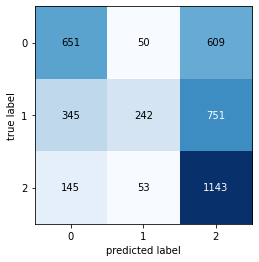

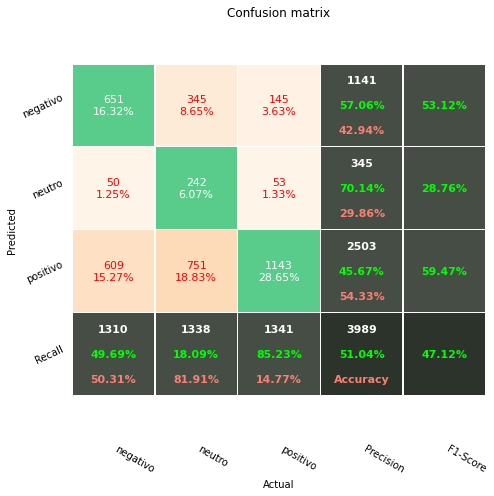

In [46]:
matriz_confusao(y_test_w2v, modelo1_pred_orig)

### Validação cruzada - modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.33      0.42      6648
           1       0.44      0.65      0.53      6648
           2       0.56      0.55      0.55      6648

    accuracy                           0.51     19944
   macro avg       0.54      0.51      0.50     19944
weighted avg       0.54      0.51      0.50     19944

Acurácia: 0.5095

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2172  3057  1419   6648
1         832  4316  1500   6648
2         572  2402  3674   6648
All      3576  9775  6593  19944 


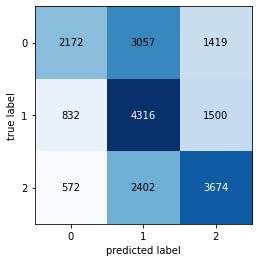

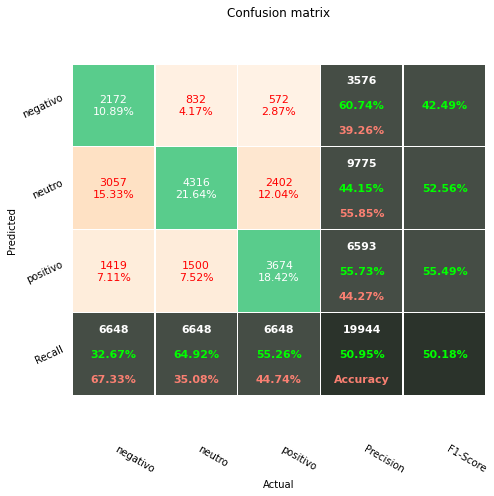

In [47]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (Word2vec e MultinomialNB)

In [48]:
# não funciona

'''
modelo2_orig = escolher_modelo(2)
modelo2_orig = modelo2_orig.fit(X_train_w2v, y_train_w2v)
modelo2_pred_orig = modelo2_orig.predict(X_test_w2v)

modelo2_pred_orig
'''

'\nmodelo2_orig = escolher_modelo(2)\nmodelo2_orig = modelo2_orig.fit(X_train_w2v, y_train_w2v)\nmodelo2_pred_orig = modelo2_orig.predict(X_test_w2v)\n\nmodelo2_pred_orig\n'

### Avaliando o modelo 2

In [49]:
#matriz_confusao(y_test_w2v, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [50]:
'''
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada2)
'''

'\nvalidacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)\nmatriz_confusao(y, validacao_cruzada2)\n'

## Modelo 3 (Word2vec e RandomForest)

In [51]:
modelo3_orig = escolher_modelo(3)
modelo3_orig = modelo3_orig.fit(X_train_w2v, y_train_w2v)
modelo3_pred_orig = modelo3_orig.predict(X_test_w2v)

modelo3_pred_orig

array([1, 0, 0, ..., 0, 1, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.86      0.80      1310
           1       0.80      0.83      0.81      1338
           2       0.78      0.65      0.71      1341

    accuracy                           0.78      3989
   macro avg       0.78      0.78      0.78      3989
weighted avg       0.78      0.78      0.78      3989

Acurácia: 0.7784

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1122    62   126  1310
1         110  1106   122  1338
2         246   218   877  1341
All      1478  1386  1125  3989 


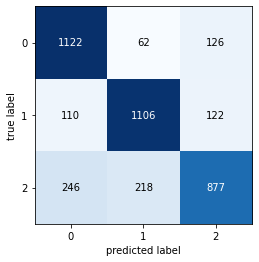

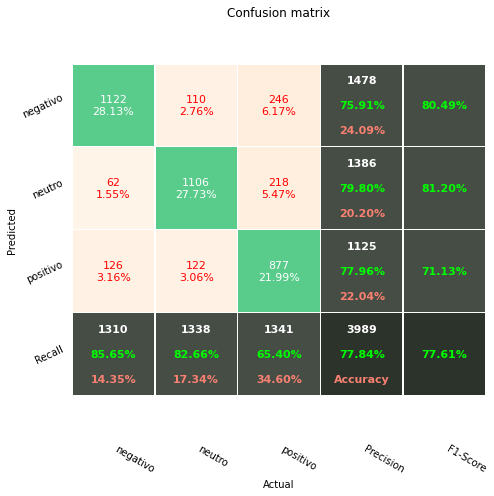

In [52]:
matriz_confusao(y_test_w2v, modelo3_pred_orig)

### Validação cruzada - modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      6648
           1       0.80      0.85      0.82      6648
           2       0.79      0.67      0.73      6648

    accuracy                           0.79     19944
   macro avg       0.79      0.79      0.79     19944
weighted avg       0.79      0.79      0.79     19944

Acurácia: 0.7921

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5714   353   581   6648
1         425  5644   579   6648
2        1158  1050  4440   6648
All      7297  7047  5600  19944 


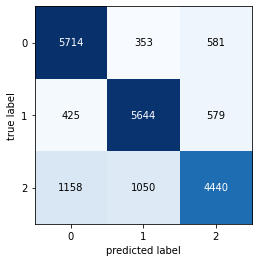

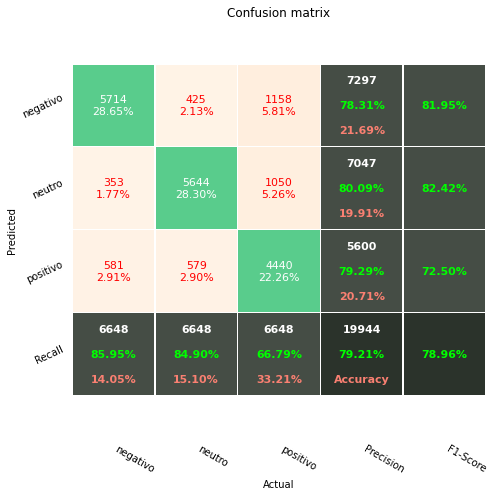

In [53]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (Word2vec e KNeighbors)

In [54]:
modelo4_orig = escolher_modelo(4)
modelo4_orig = modelo4_orig.fit(X_train_w2v, y_train_w2v)
modelo4_pred_orig = modelo4_orig.predict(X_test_w2v)

modelo4_pred_orig

array([0, 0, 2, ..., 0, 1, 2])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      1310
           1       0.63      0.54      0.58      1338
           2       0.58      0.62      0.60      1341

    accuracy                           0.60      3989
   macro avg       0.61      0.60      0.60      3989
weighted avg       0.61      0.60      0.60      3989

Acurácia: 0.6039

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         856   186   268  1310
1         284   728   326  1338
2         270   246   825  1341
All      1410  1160  1419  3989 


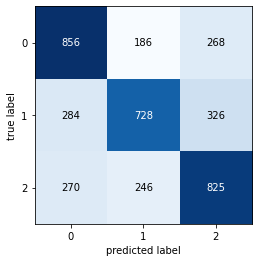

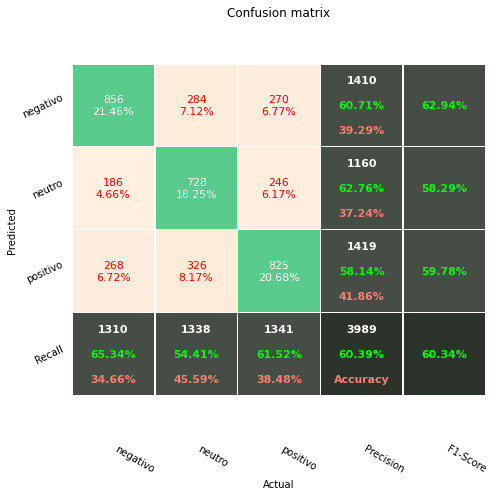

In [55]:
matriz_confusao(y_test_w2v, modelo4_pred_orig)

### Validação cruzada - modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.66      0.64      6648
           1       0.66      0.58      0.62      6648
           2       0.60      0.63      0.61      6648

    accuracy                           0.62     19944
   macro avg       0.63      0.62      0.62     19944
weighted avg       0.63      0.62      0.62     19944

Acurácia: 0.6249

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4399   824  1425   6648
1        1356  3885  1407   6648
2        1266  1203  4179   6648
All      7021  5912  7011  19944 


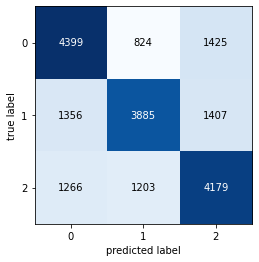

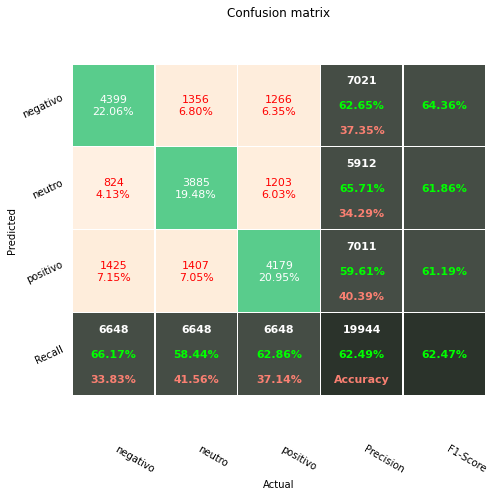

In [56]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (Word2vec e PassiveAggressive)

In [57]:
modelo5_orig = escolher_modelo(5)
modelo5_orig = modelo5_orig.fit(X_train_w2v, y_train_w2v)
modelo5_pred_orig = modelo5_orig.predict(X_test_w2v)

modelo5_pred_orig

array([1, 1, 1, ..., 1, 1, 1])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.01      0.02      1310
           1       0.34      0.99      0.50      1338
           2       0.78      0.02      0.04      1341

    accuracy                           0.34      3989
   macro avg       0.65      0.34      0.19      3989
weighted avg       0.65      0.34      0.19      3989

Acurácia: 0.3439

Matrix de confusão:
 Predito   0     1   2   All
Real                       
0        11  1298   1  1310
1         0  1330   8  1338
2         2  1308  31  1341
All      13  3936  40  3989 


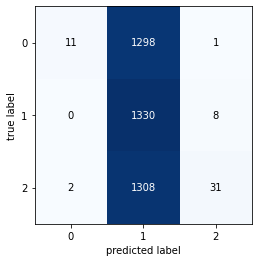

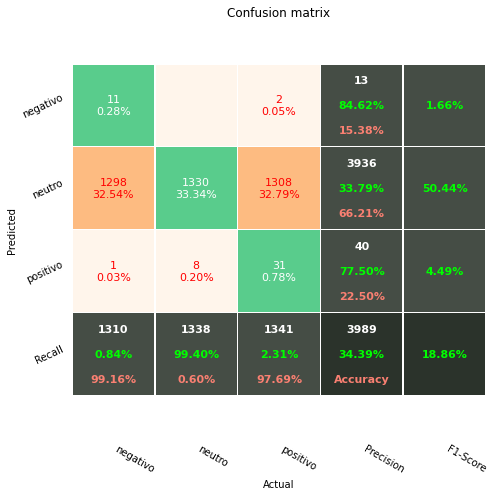

In [58]:
matriz_confusao(y_test_w2v, modelo5_pred_orig)

### Validação cruzada - modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.45      0.38      0.41      6648
           1       0.41      0.45      0.43      6648
           2       0.43      0.46      0.44      6648

    accuracy                           0.43     19944
   macro avg       0.43      0.43      0.43     19944
weighted avg       0.43      0.43      0.43     19944

Acurácia: 0.4296

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        2518  2183  1947   6648
1        1563  3004  2081   6648
2        1460  2142  3046   6648
All      5541  7329  7074  19944 


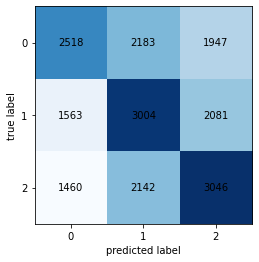

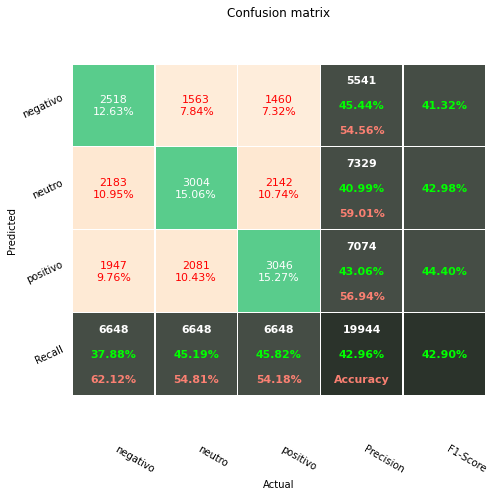

In [59]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (Word2vec e GradientBoosting)

In [60]:
modelo6_orig = escolher_modelo(6)
modelo6_orig = modelo6_orig.fit(X_train_w2v, y_train_w2v)
modelo6_pred_orig = modelo6_orig.predict(X_test_w2v)

modelo6_pred_orig

array([0, 0, 1, ..., 0, 1, 2])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      1310
           1       0.65      0.58      0.62      1338
           2       0.64      0.68      0.66      1341

    accuracy                           0.64      3989
   macro avg       0.64      0.64      0.64      3989
weighted avg       0.64      0.64      0.64      3989

Acurácia: 0.6438

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         878   195   237  1310
1         292   781   265  1338
2         213   219   909  1341
All      1383  1195  1411  3989 


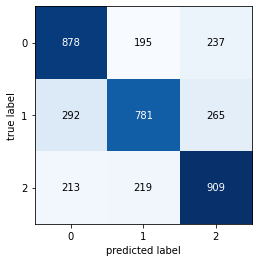

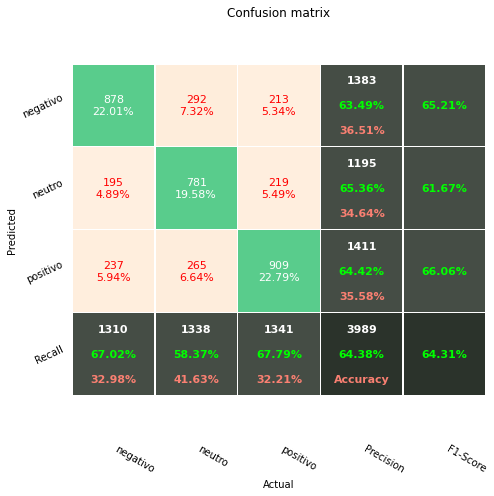

In [61]:
matriz_confusao(y_test_w2v, modelo6_pred_orig)

### Validação cruzada - modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.68      0.66      6648
           1       0.66      0.59      0.63      6648
           2       0.67      0.69      0.68      6648

    accuracy                           0.66     19944
   macro avg       0.66      0.66      0.66     19944
weighted avg       0.66      0.66      0.66     19944

Acurácia: 0.6570

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4541  1043  1064   6648
1        1469  3955  1224   6648
2        1059   982  4607   6648
All      7069  5980  6895  19944 


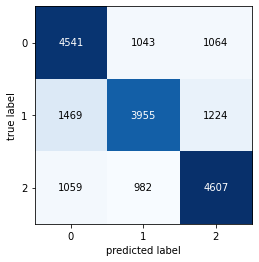

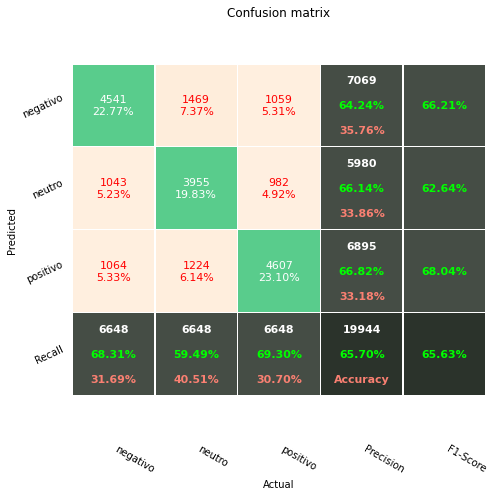

In [62]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (Word2vec e XGB)

In [63]:
modelo7_orig = escolher_modelo(7)
modelo7_orig = modelo7_orig.fit(X_train_w2v, y_train_w2v)
modelo7_pred_orig = modelo7_orig.predict(X_test_w2v)

modelo7_pred_orig

array([0, 0, 1, ..., 0, 1, 1])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      1310
           1       0.64      0.56      0.60      1338
           2       0.64      0.67      0.65      1341

    accuracy                           0.63      3989
   macro avg       0.63      0.63      0.63      3989
weighted avg       0.63      0.63      0.63      3989

Acurácia: 0.6285

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         857   210   243  1310
1         317   752   269  1338
2         231   212   898  1341
All      1405  1174  1410  3989 


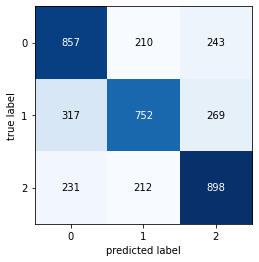

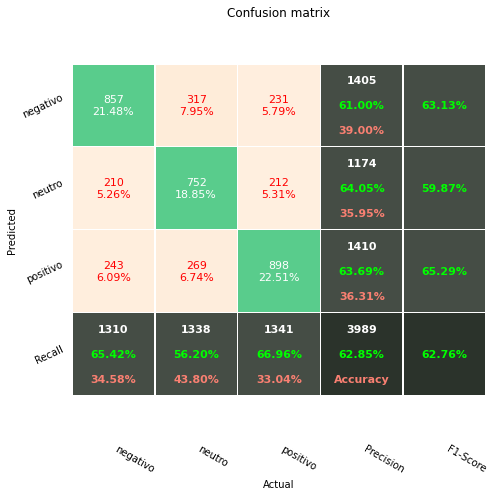

In [64]:
matriz_confusao(y_test_w2v, modelo7_pred_orig)

### Validação cruzada - modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.63      0.67      0.65      6648
           1       0.64      0.56      0.60      6648
           2       0.65      0.69      0.67      6648

    accuracy                           0.64     19944
   macro avg       0.64      0.64      0.64     19944
weighted avg       0.64      0.64      0.64     19944

Acurácia: 0.6412

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4467  1064  1117   6648
1        1588  3744  1316   6648
2        1070  1001  4577   6648
All      7125  5809  7010  19944 


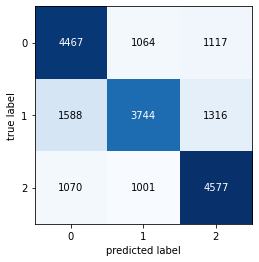

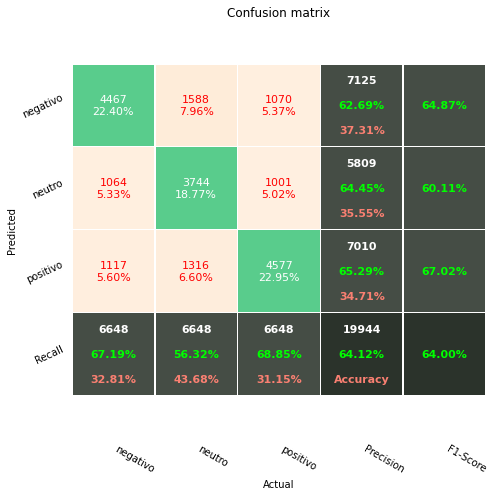

In [65]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (Word2vec e MLP)

In [66]:
modelo8_orig = escolher_modelo(8)
modelo8_orig = modelo8_orig.fit(X_train_w2v, y_train_w2v)
modelo8_pred_orig = modelo8_orig.predict(X_test_w2v)

modelo8_pred_orig

array([0, 0, 1, ..., 0, 1, 1])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72      1310
           1       0.69      0.62      0.66      1338
           2       0.72      0.68      0.70      1341

    accuracy                           0.69      3989
   macro avg       0.69      0.69      0.69      3989
weighted avg       0.69      0.69      0.69      3989

Acurácia: 0.6914

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1012   151   147  1310
1         295   834   209  1338
2         211   218   912  1341
All      1518  1203  1268  3989 


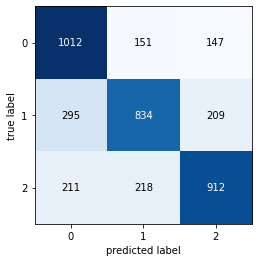

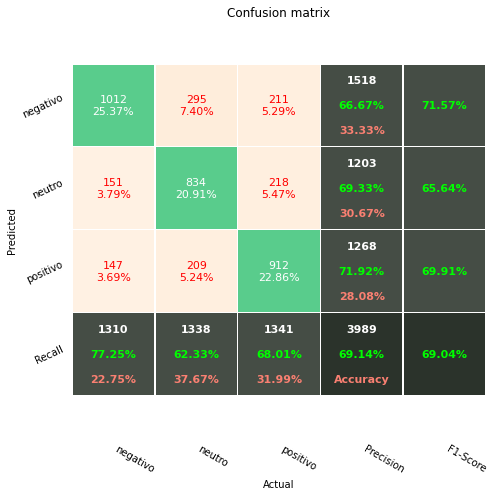

In [67]:
matriz_confusao(y_test_w2v, modelo8_pred_orig)

### Validação cruzada - modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      6648
           1       0.68      0.71      0.69      6648
           2       0.73      0.69      0.71      6648

    accuracy                           0.71     19944
   macro avg       0.71      0.71      0.71     19944
weighted avg       0.71      0.71      0.71     19944

Acurácia: 0.7054

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4796  1082   770   6648
1        1010  4692   946   6648
2         911  1156  4581   6648
All      6717  6930  6297  19944 


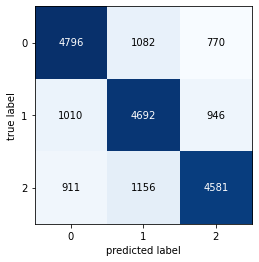

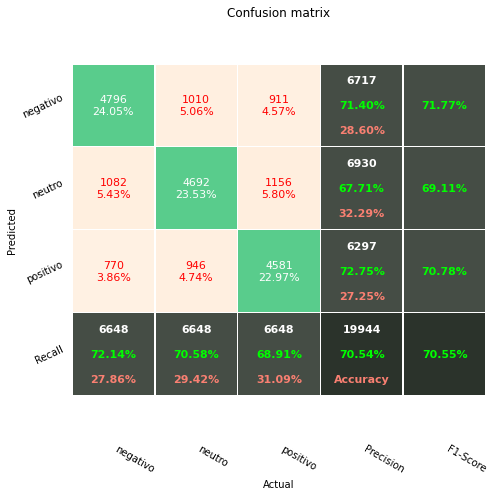

In [68]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (Word2vec e LogisticRegression)

In [69]:
modelo9_orig = escolher_modelo(9)
modelo9_orig = modelo9_orig.fit(X_train_w2v, y_train_w2v)
modelo9_pred_orig = modelo9_orig.predict(X_test_w2v)

modelo9_pred_orig

array([0, 0, 1, ..., 0, 0, 2])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59      1310
           1       0.56      0.52      0.54      1338
           2       0.63      0.64      0.63      1341

    accuracy                           0.59      3989
   macro avg       0.59      0.59      0.59      3989
weighted avg       0.59      0.59      0.59      3989

Acurácia: 0.5871

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         790   293   227  1310
1         357   697   284  1338
2         232   254   855  1341
All      1379  1244  1366  3989 


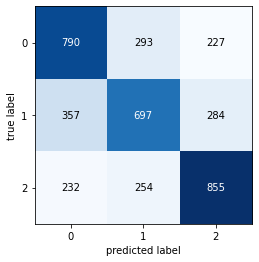

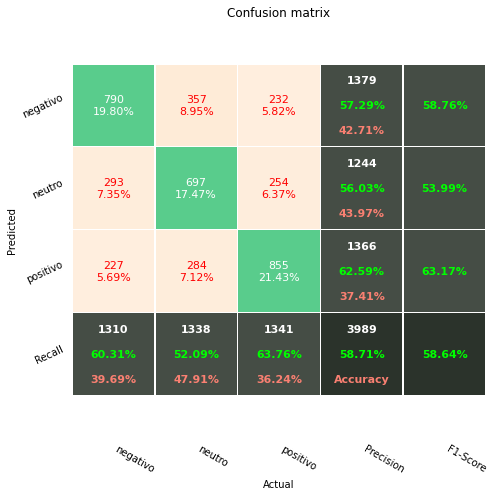

In [70]:
matriz_confusao(y_test_w2v, modelo9_pred_orig)

### Validação cruzada - modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.57      0.60      0.59      6648
           1       0.54      0.52      0.53      6648
           2       0.63      0.62      0.62      6648

    accuracy                           0.58     19944
   macro avg       0.58      0.58      0.58     19944
weighted avg       0.58      0.58      0.58     19944

Acurácia: 0.5791

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4000  1604  1044   6648
1        1807  3435  1406   6648
2        1191  1342  4115   6648
All      6998  6381  6565  19944 


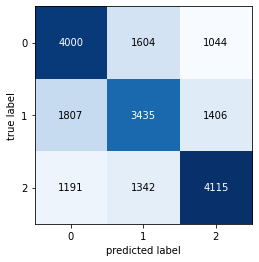

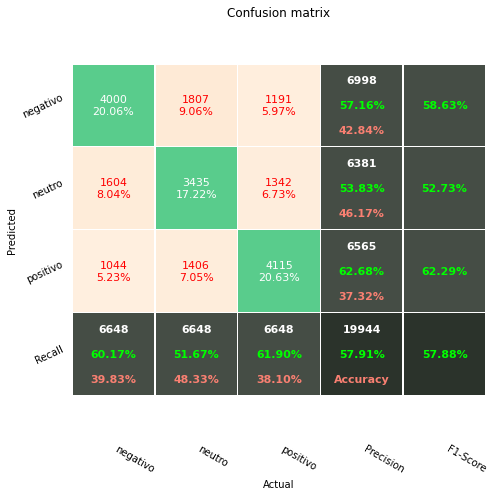

In [71]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (Word2vec e SVC)

In [72]:
modelo10_orig = escolher_modelo(10)
modelo10_orig = modelo10_orig.fit(X_train_w2v, y_train_w2v)
modelo10_pred_orig = modelo10_orig.predict(X_test_w2v)

modelo10_pred_orig

array([0, 0, 0, ..., 0, 0, 1])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.48      0.64      0.55      1310
           1       0.50      0.36      0.42      1338
           2       0.54      0.52      0.53      1341

    accuracy                           0.51      3989
   macro avg       0.51      0.51      0.50      3989
weighted avg       0.51      0.51      0.50      3989

Acurácia: 0.5081

Matrix de confusão:
 Predito     0    1     2   All
Real                          
0         838  238   234  1310
1         498  486   354  1338
2         398  240   703  1341
All      1734  964  1291  3989 


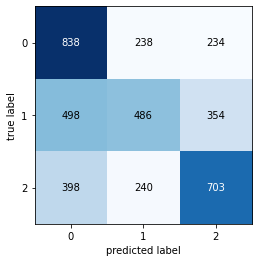

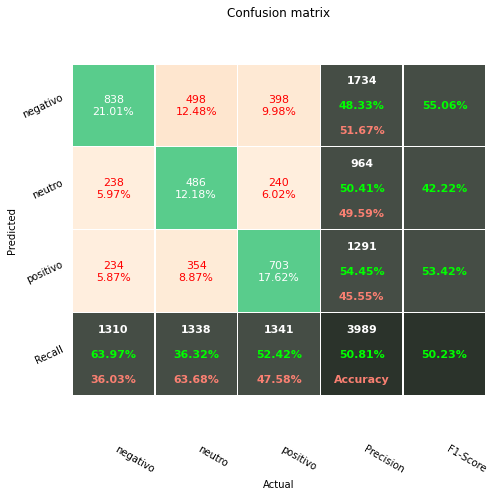

In [73]:
matriz_confusao(y_test_w2v, modelo10_pred_orig)

### Validação cruzada - modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.49      0.63      0.55      6648
           1       0.51      0.39      0.44      6648
           2       0.56      0.53      0.54      6648

    accuracy                           0.52     19944
   macro avg       0.52      0.52      0.51     19944
weighted avg       0.52      0.52      0.51     19944

Acurácia: 0.5161

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4185  1308  1155   6648
1        2433  2608  1607   6648
2        1908  1240  3500   6648
All      8526  5156  6262  19944 


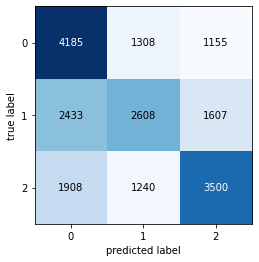

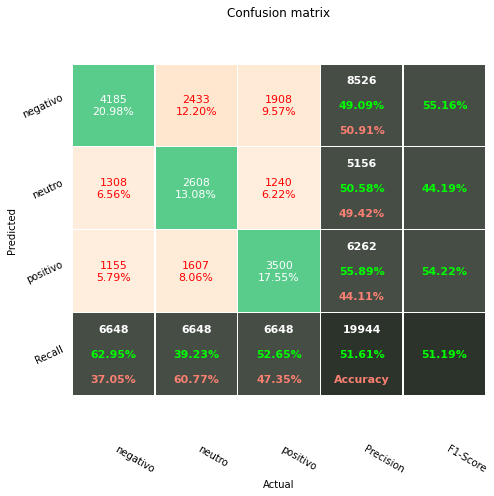

In [74]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [75]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test_w2v, modelo1_pred_orig, output_dict=True)
# report2 = metrics.classification_report(y_test_w2v, modelo2_pred_orig, output_dict=True) não funciona
report3 = metrics.classification_report(y_test_w2v, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test_w2v, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test_w2v, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test_w2v, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test_w2v, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test_w2v, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test_w2v, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test_w2v, modelo10_pred_orig, output_dict=True)

In [76]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'f1_media', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [77]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy


In [78]:
# MultinomialNB não funciona

# criando a lista com o modelos de classificação
modelos = ['SGD_word2vec',
            'RandomForest_word2vec',
            'KNeighbors_word2vec',
            'PassiveAggressive_word2vec',
            'GradientBoosting_word2vec',
            'XGB_word2vec',
            'MLP_word2vec',
            'LogisticRegression_word2vec',
            'SVC_word2vec']

In [79]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [80]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['weighted avg']['f1-score'],2),
                    round(reports[i]['accuracy'], 2)] 

In [81]:
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy
1,RandomForest_word2vec,0.76,0.80,0.78,0.86,0.83,0.65,0.80,0.81,0.71,0.78,0.78
6,MLP_word2vec,0.67,0.69,0.72,0.77,0.62,0.68,0.72,0.66,0.70,0.69,0.69
4,GradientBoosting_word2vec,0.63,0.65,0.64,0.67,0.58,0.68,0.65,0.62,0.66,0.64,0.64
5,XGB_word2vec,0.61,0.64,0.64,0.65,0.56,0.67,0.63,0.60,0.65,0.63,0.63
2,KNeighbors_word2vec,0.61,0.63,0.58,0.65,0.54,0.62,0.63,0.58,0.60,0.60,0.60
7,LogisticRegression_word2vec,0.57,0.56,0.63,0.60,0.52,0.64,0.59,0.54,0.63,0.59,0.59
0,SGD_word2vec,0.57,0.70,0.46,0.50,0.18,0.85,0.53,0.29,0.59,0.47,0.51
8,SVC_word2vec,0.48,0.50,0.54,0.64,0.36,0.52,0.55,0.42,0.53,0.50,0.51
3,PassiveAggressive_word2vec,0.85,0.34,0.78,0.01,0.99,0.02,0.02,0.50,0.04,0.19,0.34
